# Non-technical evaluation plots

Produces plots for non-technical evaluation of the model at a given step. The result is a series of line plots showing forecasts, actuals, and a dashed line between the two along with the percent and absolute difference between them. Loops through multiple steps. 

In [2]:
import requests
import pandas as pd
import json
import os
from pathlib import Path

#import matplotlib.pyplot as plt

# External
import geopandas as gpd
import sqlalchemy as sa

# VIEWS
from viewser.operations import fetch
from views_mapper2.mapper2 import *
from views_mapper2.BBoxWriter import *
from views_mapper2.dictionary_writer import *
from ingester3.config import source_db_path
from views_forecasts.extensions import *


## Fetch forecasts from internal storage

In [3]:
for EndOfHistory in range(519, 538 + 1):

    #which model do you want to be graphed within this notebook (accepts one model only)
    model_wanted = 'genetic_ensemble'
    model_wanted_pgm = 'ensemble_cm_calib'

    #current month run description
    dev_id = 'fatalities002'
    run_id = dev_id
    model_attempt = 't01'

    predstore_future = 'cm_' + model_wanted + '_f' + str(EndOfHistory)

    predictions_df = pd.DataFrame.forecasts.read_store(predstore_future, run=dev_id)
    predictions_df = predictions_df.reset_index()
    predictions_df['step'] = predictions_df['month_id'] - EndOfHistory

    # Rename column
    predictions_df.rename(columns={'step_combined': 'main_mean_ln'}, inplace=True)

    # Apply inverse natural log
    predictions_df['main_mean'] = np.expm1(predictions_df['main_mean_ln'])

    # Filter for country_id 124
    predictions_df = predictions_df[predictions_df['country_id'] == 124]

    # Reset index after filtering
    predictions_df = predictions_df.set_index(['step', 'month_id'], drop=True)

    # Dynamically rename the DataFrame based on EndOfHistory
    globals()[f'predictions_df_{EndOfHistory}'] = predictions_df


pr_46_cm_genetic_ensemble_f519.parquet
pr_46_cm_genetic_ensemble_f520.parquet
pr_46_cm_genetic_ensemble_f521.parquet
pr_46_cm_genetic_ensemble_f522.parquet
pr_46_cm_genetic_ensemble_f523.parquet
pr_46_cm_genetic_ensemble_f524.parquet
pr_46_cm_genetic_ensemble_f525.parquet
pr_46_cm_genetic_ensemble_f526.parquet
pr_46_cm_genetic_ensemble_f527.parquet
pr_46_cm_genetic_ensemble_f528.parquet
pr_46_cm_genetic_ensemble_f529.parquet
pr_46_cm_genetic_ensemble_f530.parquet
pr_46_cm_genetic_ensemble_f531.parquet
pr_46_cm_genetic_ensemble_f532.parquet
pr_46_cm_genetic_ensemble_f533.parquet
pr_46_cm_genetic_ensemble_f534.parquet
pr_46_cm_genetic_ensemble_f535.parquet
pr_46_cm_genetic_ensemble_f536.parquet
pr_46_cm_genetic_ensemble_f537.parquet
pr_46_cm_genetic_ensemble_f538.parquet


In [4]:
predictions_df_519

,feature,country_id,main_mean_ln,main_mean
step,month_id,,,
1,520,124,4.939528,138.704326
2,521,124,5.377005,215.373222
3,522,124,5.611314,272.503288
4,523,124,5.784540,324.232478
5,524,124,5.856406,348.465764
6,525,124,5.719933,303.884394
7,526,124,5.748061,312.582015
8,527,124,5.762335,317.090219
9,528,124,6.059048,426.967670


In [71]:
predictions_df_524

,feature,country_id,main_mean_ln,main_mean
step,month_id,,,
1,525,124,4.316436,73.921131
2,526,124,4.774432,117.442982
3,527,124,4.776076,117.637868
4,528,124,4.887139,131.573770
5,529,124,5.094061,162.050606
6,530,124,4.853636,127.205684
7,531,124,5.098695,162.808054
8,532,124,5.340458,207.608314
9,533,124,5.090117,161.408889


In [81]:
predictions_df_537

,feature,country_id,main_mean_ln,main_mean
step,month_id,,,
1,538,124,3.337143,27.138623
2,539,124,3.674918,38.445429
3,540,124,3.676020,38.488909
4,541,124,3.672260,38.340712
5,542,124,3.805358,43.941326
6,543,124,3.731143,40.726787
7,544,124,3.955397,51.216400
8,545,124,4.115083,60.257303
9,546,124,4.194405,65.314264


## Fetch UCDP data from the API

In [76]:
PAGE_SIZE = 1000

# Construct the API URL
VIEWS_URL = f'https://api.viewsforecasting.org/predictors_fatalities002_0000_00/cm/px/ucdp_ged_sb_best_sum?iso=YEM&page_size={PAGE_SIZE}'
master_list = []

# Initial API request
r = requests.get(VIEWS_URL)
page_data = r.json()

# Append the data from the first page
master_list += page_data['data']

# Handle pagination
while page_data.get('next_page'):
    r = requests.get(page_data['next_page'])
    page_data = r.json()
    master_list += page_data['data']

# Convert the collected data to a DataFrame
ged_raw = pd.DataFrame(master_list)

UCDP = ged_raw.sort_values('month_id')  # Ensure ascending order
UCDP



,country_id,month_id,name,gwcode,isoab,year,month,ucdp_ged_sb_best_sum
0,196,121,Yemen Arab Republic,678,YEM,1990,1,0.0
1,196,122,Yemen Arab Republic,678,YEM,1990,2,0.0
2,196,123,Yemen Arab Republic,678,YEM,1990,3,0.0
3,196,124,Yemen Arab Republic,678,YEM,1990,4,0.0
4,196,125,Yemen Arab Republic,678,YEM,1990,5,0.0
...,...,...,...,...,...,...,...,...
415,124,534,Yemen,678,YEM,2024,6,20.0
416,124,535,Yemen,678,YEM,2024,7,13.0
417,124,536,Yemen,678,YEM,2024,8,7.0
418,124,537,Yemen,678,YEM,2024,9,28.0


In [77]:
#Map numeric month values to month abbreviations
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Add a 'Date' column to the DataFrame
UCDP['Date'] = UCDP['month'].map(month_map).astype(str)  + '-' + UCDP['year'].astype(str)

UCDP


,country_id,month_id,name,gwcode,isoab,year,month,ucdp_ged_sb_best_sum,Date
0,196,121,Yemen Arab Republic,678,YEM,1990,1,0.0,Jan-1990
1,196,122,Yemen Arab Republic,678,YEM,1990,2,0.0,Feb-1990
2,196,123,Yemen Arab Republic,678,YEM,1990,3,0.0,Mar-1990
3,196,124,Yemen Arab Republic,678,YEM,1990,4,0.0,Apr-1990
4,196,125,Yemen Arab Republic,678,YEM,1990,5,0.0,May-1990
...,...,...,...,...,...,...,...,...,...
415,124,534,Yemen,678,YEM,2024,6,20.0,Jun-2024
416,124,535,Yemen,678,YEM,2024,7,13.0,Jul-2024
417,124,536,Yemen,678,YEM,2024,8,7.0,Aug-2024
418,124,537,Yemen,678,YEM,2024,9,28.0,Sep-2024


## Plot the data

### Create a dictionary mapping month_id to New_date in the UCDP DataFrame


In [78]:
# Create a dictionary mapping month_id to New_date in the UCDP DataFrame
month_id_to_date = dict(zip(UCDP['month_id'], UCDP['Date']))

month_id_to_date['539'] = 'Nov-2024'
month_id_to_date['540'] = 'Dec-2024'

# NOTE: Since this is based on the filtered UCDP data, it can only to up to Oct-2024. For a longer x axis, we need a longer dataset. 

# Print the dictionary to verify
print(month_id_to_date)

{121: 'Jan-1990', 122: 'Feb-1990', 123: 'Mar-1990', 124: 'Apr-1990', 125: 'May-1990', 126: 'Jun-1990', 127: 'Jul-1990', 128: 'Aug-1990', 129: 'Sep-1990', 130: 'Oct-1990', 131: 'Nov-1990', 132: 'Dec-1990', 133: 'Jan-1991', 134: 'Feb-1991', 135: 'Mar-1991', 136: 'Apr-1991', 137: 'May-1991', 138: 'Jun-1991', 139: 'Jul-1991', 140: 'Aug-1991', 141: 'Sep-1991', 142: 'Oct-1991', 143: 'Nov-1991', 144: 'Dec-1991', 145: 'Jan-1992', 146: 'Feb-1992', 147: 'Mar-1992', 148: 'Apr-1992', 149: 'May-1992', 150: 'Jun-1992', 151: 'Jul-1992', 152: 'Aug-1992', 153: 'Sep-1992', 154: 'Oct-1992', 155: 'Nov-1992', 156: 'Dec-1992', 157: 'Jan-1993', 158: 'Feb-1993', 159: 'Mar-1993', 160: 'Apr-1993', 161: 'May-1993', 162: 'Jun-1993', 163: 'Jul-1993', 164: 'Aug-1993', 165: 'Sep-1993', 166: 'Oct-1993', 167: 'Nov-1993', 168: 'Dec-1993', 169: 'Jan-1994', 170: 'Feb-1994', 171: 'Mar-1994', 172: 'Apr-1994', 173: 'May-1994', 174: 'Jun-1994', 175: 'Jul-1994', 176: 'Aug-1994', 177: 'Sep-1994', 178: 'Oct-1994', 179: 'Nov-199

### Plot the data

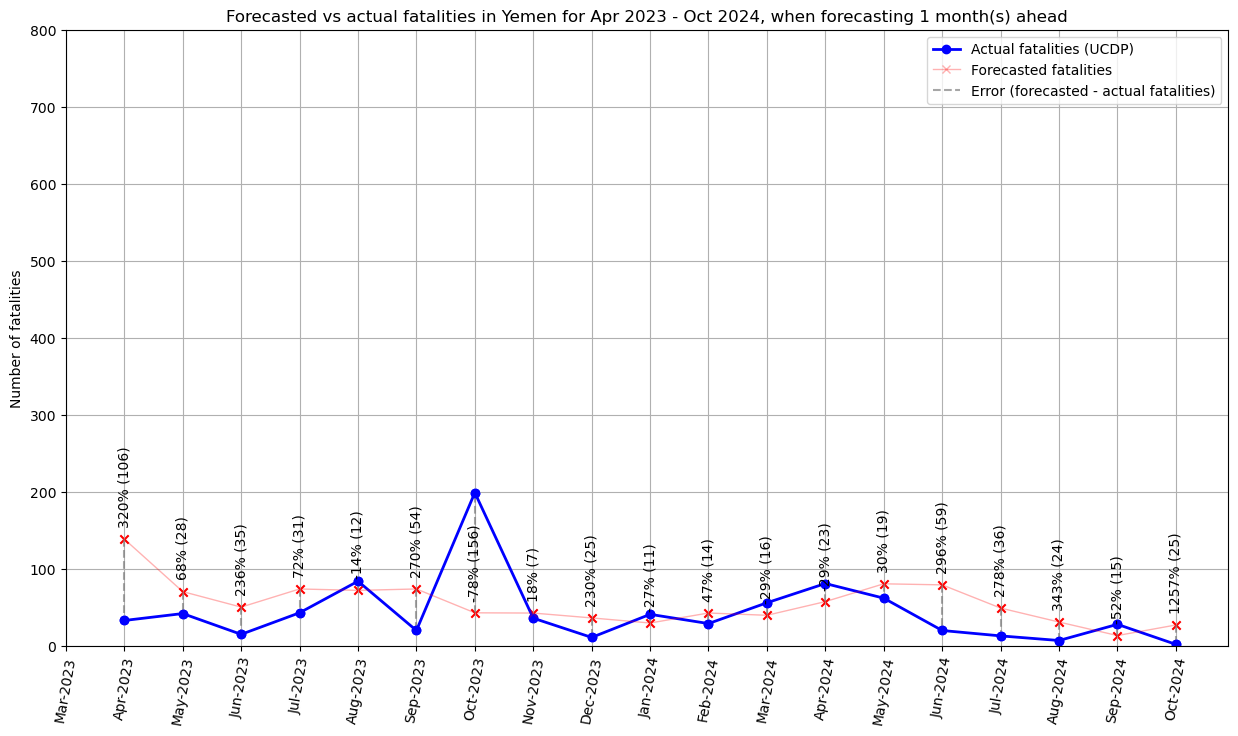

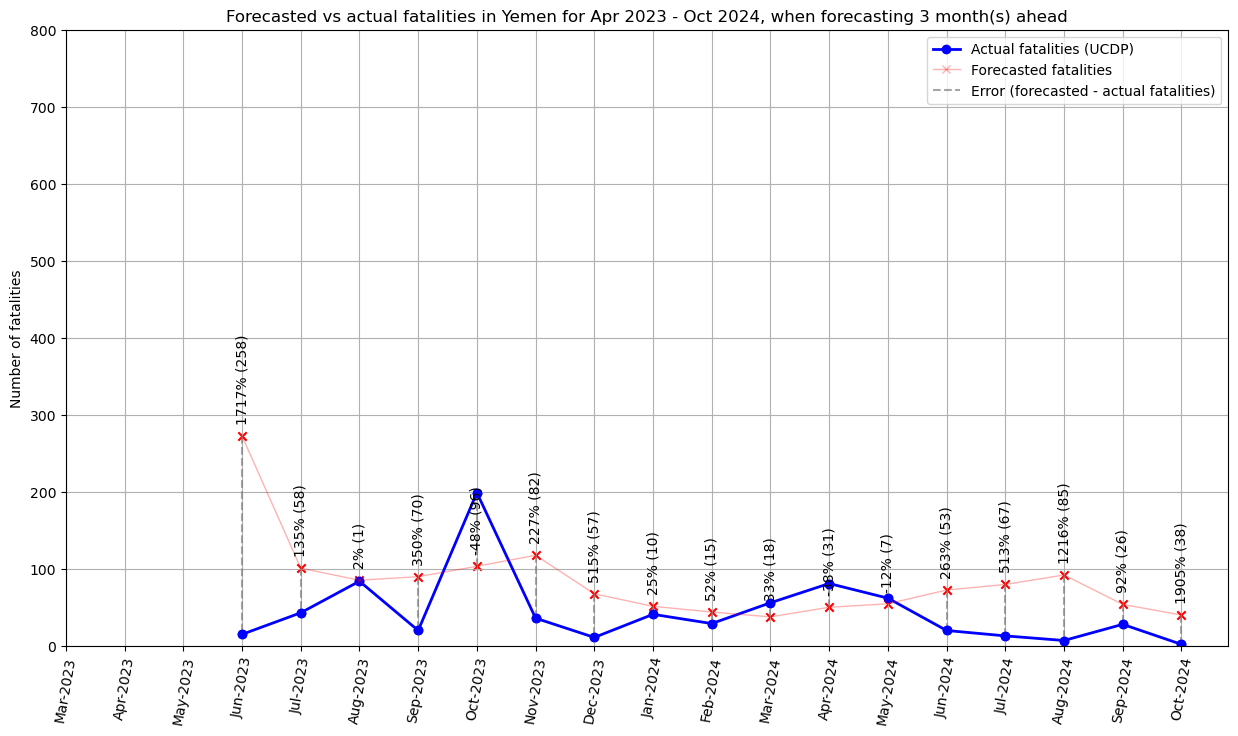

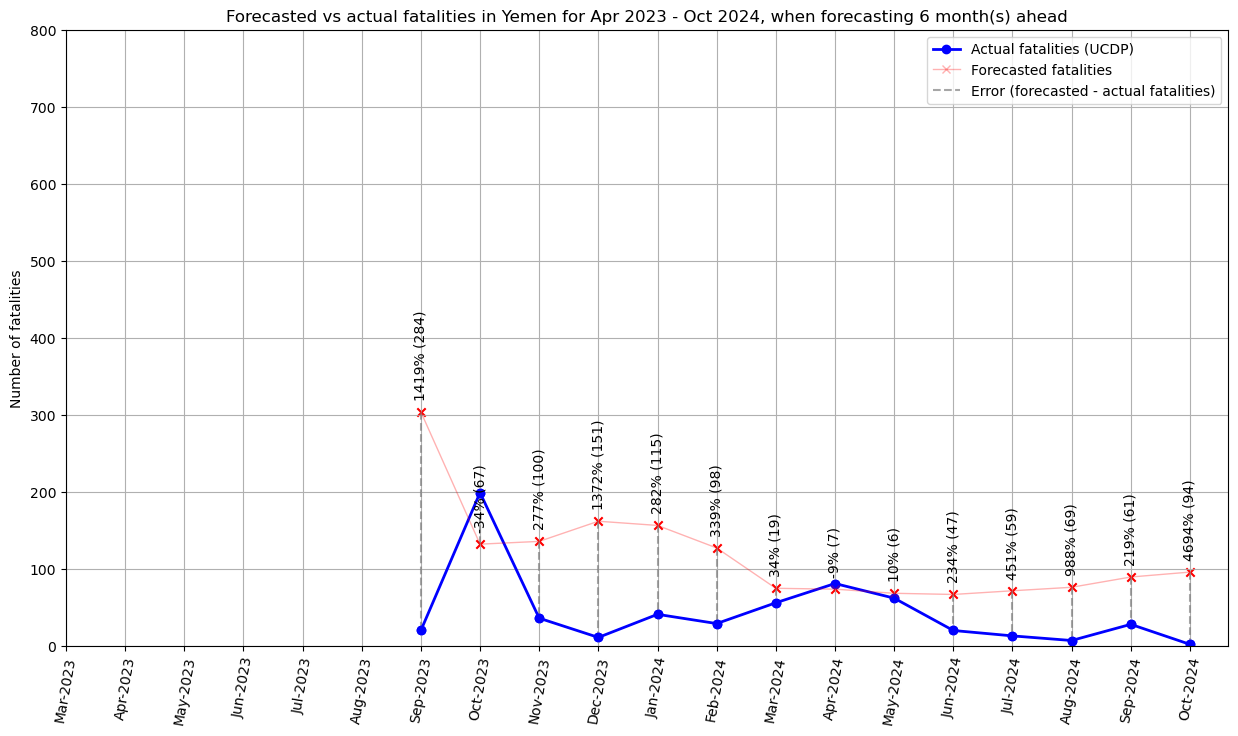

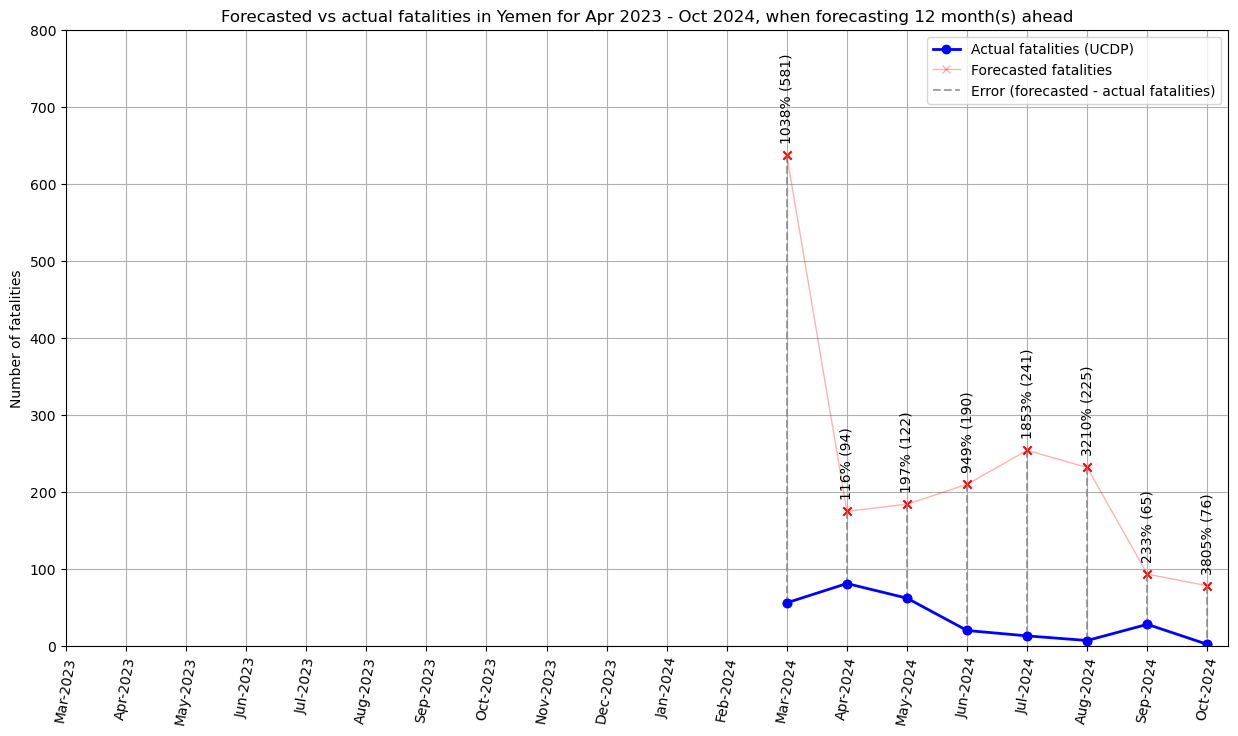

In [79]:
# CORRECT

steps = [1, 3, 6, 12]

# Create the dictionary mapping month_id to New_date
month_id_to_date = dict(zip(UCDP['month_id'], UCDP['Date']))

for step in steps:

    # Define the range of month_ids you want to include
    month_ids_to_plot = range(519, 539)  # Example range, adjust as needed

    # Initialize plot
    plt.figure(figsize=(15, 8))

    # Lists to store the actual and forecasted values for later plotting of the line
    actual_values = []
    forecasted_values = []
    month_ids_for_lines = []

    # Loop through the month_ids_to_plot to generate the plots for each month
    for month_id in month_ids_to_plot:
        # Access the corresponding predictions_df using globals
        predictions_df_name = f'predictions_df_{month_id}'  # Dynamic name based on month_id
        
        if predictions_df_name in globals():
            # Get the predictions_df from globals
            predictions_df = globals()[predictions_df_name]

            # Filter the rows where 'step' == the current forecast step (e.g., step 1, step 2, etc.)
            step_rows = predictions_df.loc[predictions_df.index.get_level_values('step') == step]

            # Check if step_rows contains data
            if not step_rows.empty:
                # Retrieve the forecasted value from 'main_mean' for the current 'step'
                forecasted_value = step_rows['main_mean'].iloc[0]  # Assuming you want the first match

                # Adjust the month_id for the forecasted step (month_id + step)
                forecasted_month_id = month_id + step

                # Get the actual value from UCDP DataFrame for the adjusted forecasted month_id
                if forecasted_month_id in UCDP['month_id'].values:
                    actual_value = UCDP.loc[UCDP['month_id'] == forecasted_month_id, 'ucdp_ged_sb_best_sum'].iloc[0]
                else:
                    actual_value = None  # Handle if no corresponding actual value exists

                # If actual value exists, plot forecasted and actual values and add a dashed line
                if actual_value is not None:
                    # Plot the forecasted value (red 'x' marker)
                    plt.scatter(forecasted_month_id, forecasted_value, marker='x', color='red', label='_nolegend_')

                    # Plot the actual value (blue 'o' marker)
                    plt.scatter(forecasted_month_id, actual_value, marker='o', color='blue', label='_nolegend_')

                    # Connect the forecasted and actual values with a dashed line
                    plt.plot([forecasted_month_id, forecasted_month_id], [forecasted_value, actual_value], linestyle='--', color='gray', alpha=0.7)

                    # Calculate percent change and absolute difference
                    percent_change = ((forecasted_value - actual_value) / actual_value) * 100 if actual_value != 0 else 0
                    absolute_difference = abs(forecasted_value - actual_value)

                    # Add the percent change text above the red "x"
                    text_x_offset = 0  # Adjust to your liking
                    text_y_offset = 15  # Adjust to your liking to place the text above the red "x"
                    plt.text(
                        forecasted_month_id + text_x_offset,  # Adjust horizontal placement if needed
                        forecasted_value + text_y_offset,  # Place text above the red "x"
                        f'{percent_change:.0f}% ({absolute_difference:.0f})',
                        rotation=90,  # Text should be horizontal
                        color='black',
                        ha='center',
                        va='bottom'  # Align the text at the bottom (so it appears above the marker)
                    )

                    # Add to the lists for the actual values line
                    actual_values.append(actual_value)
                    forecasted_values.append(forecasted_value)
                    month_ids_for_lines.append(forecasted_month_id)

    # Plot a line connecting the actual values
    plt.plot(month_ids_for_lines, actual_values, label='Actual fatalities (UCDP)', marker='o', color='blue', linestyle='-', linewidth=2)

    plt.plot(month_ids_for_lines, forecasted_values, label='Forecasted fatalities', marker='x', linestyle='-', color='red', alpha=0.3, linewidth=1)

    # Adding the legend entry for the dashed line (Difference)
    difference_legend = plt.plot([], [], linestyle='--', color='gray', alpha=0.7, label='Error (forecasted - actual fatalities)')

    # Customize the plot with labels and title
    #plt.xlabel('Month ID')
    
    # Set the x-axis limits to ensure the full range from Apr 2023 to Oct 2024 is displayed
    #plt.xlim(min(month_ids_to_plot), max(month_ids_to_plot))  # Adjust according to your data range
    
    # Set ticks using the month_id_to_date dictionary
    tick_positions = range(min(month_ids_to_plot), max(month_ids_to_plot) +1)  # Adjust for the entire time range
    tick_labels = [month_id_to_date.get(month_id, '') for month_id in tick_positions]
    plt.xticks(tick_positions, tick_labels, rotation=80)
    
    plt.ylabel('Number of fatalities')
    plt.title(f'Forecasted vs actual fatalities in Yemen for Apr 2023 - Oct 2024, when forecasting {step} month(s) ahead')

    # Add the legend to include forecasted fatalities, actual fatalities, and difference
    plt.legend(loc='upper right')

    # Add a grid to the plot
    plt.grid(True)

    # Set the y-axis limits
    plt.ylim(0, 800)

    # Save the plot
    plt.savefig(f'/Users/alm/Desktop/Yemen_eval_forecast_vs_actual_step{step}.png', dpi=300)

    # Show the plot
    plt.show()
